<a href="https://colab.research.google.com/github/v-3sg/sales_predictions/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
filename = "/content/drive/MyDrive/Colab Notebooks/Coding Dojo/DS Week 1/sales_predictions.csv"


In [2]:
df = pd.read_csv(filename)

1 - Explore the data - what do you need to do to clean this data? Clean it!



Data Dictionary for this dataset:

Variable Name	Description

Item_Identifier	Unique product ID

Item_Weight	Weight of product

Item_Fat_Content	Whether the product is low fat or regular

Item_Visibility	The percentage of total display area of all products in a store allocated to the particular product

Item_Type	The category to which the product belongs

Item_MRP	Maximum Retail Price (list price) of the product

Outlet_Identifier	Unique store ID

Outlet_Establishment_Year	The year in which store was established

Outlet_Size	The size of the store in terms of ground area covered

Outlet_Location_Type	The type of area in which the store is located

Outlet_Type	Whether the outlet is a grocery store or some sort of supermarket

Item_Outlet_Sales	Sales of the product in the particular store. This is the target variable to be predicted.


**--> Based on the Data Dictionary, potential irrelevant columns include:**

**Outlet_Establishment_Year**

**Outlet_Size**

**Outlet_Location**

**Outlet_Type**

**... However, there is the possibility that these columns represent variables that may affect whether a certain food item is purchased, e.g., an outlet of a certain size/type/age may nudge a customer to buy an item. My initial thought is not to drop any columns.**


In [3]:
#check for duplicates
df.duplicated().any()

False

**--> No duplicates present**

2- Are there missing values in this dataset? Some stores might not report all the data due to technical glitches or other issues. If so, deal with these appropriately.

In [4]:
#explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
#check for NaNs/nulls
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**--> Confirmed count of null values for Item_Weight (1463) and Outlet_Size (2410)**

3 - What are some summary statistics, aggregate information, or other useful trends you can see from the data using Pandas?

In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [8]:
#explore descriptive statistics of data
df.describe(include = 'all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDG33,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


**--> Summary of statistics:**

**There seems to be a weight outlier (min of Item_Weight = 4.555). Note Item_Weight data may be skewed due to presence of NaN values for this column.**

**Low Fat items seemed to be the most bought (Item_Fat_Content frequency = 5089)**

**Average price of purchased items was about 140.99 (see Item_MRP). Possible outliers for min value and max value.**

**For Outlet_Size, frequency of Medium was highest (2793); however, this may be skewed due to presence of NaN values for this column.**

**For Outlet_Location_Type, frequency of Tier 3 was highest (3350).**

**For Outlet_Type, frequency of Supermarket Type 1 was highest (5577).**

**For Item_Outlet_Sales, there seems to be outliers with min at 33.29 and max at 13086.96**




In [9]:
#look at sample of null values
null_df = df[df.isnull().any(axis=1)]
null_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


**--> Cannot determine any pattern with the NaN values**

For Part3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

Histogram to view the distributions of various features in your dataset.

Boxplot to view statistical summaries of various features in your dataset.

Heatmap of the correlation between features.

In [10]:
import matplotlib.pyplot as plot
import seaborn as sns

**--> Histograms**

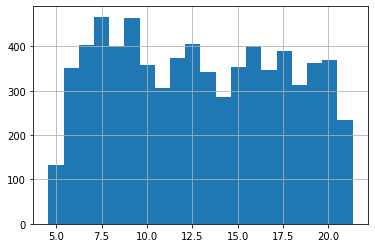

In [11]:
#histogram
#item weight

df['Item_Weight'].hist(bins = 20)

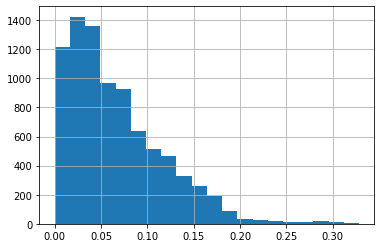

In [12]:
#histogram
#item visibility

df['Item_Visibility'].hist(bins = 20)

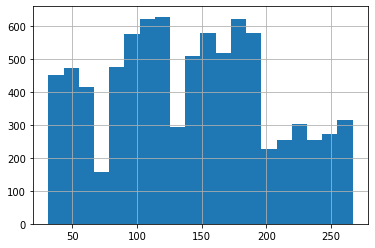

In [13]:
#histogram
#item MRP

df['Item_MRP'].hist(bins = 20)

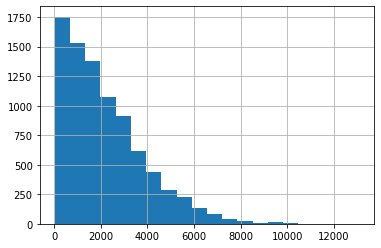

In [14]:
#histogram
#item outlet sales

df['Item_Outlet_Sales'].hist(bins = 20)

**--> Bar Chart (Just Curious)**

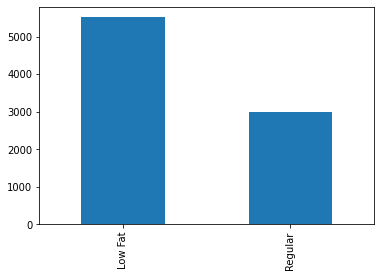

In [15]:
#columns below are categorical and would be better suited with bar chart
#item fat content
#outlet size
#outlet location type
#outlet type

#initial bar chart shows stray values "low fat", "LF", "reg"
#rename values then redo histogram
df = df.replace(['low fat','LF'],'Low Fat')
df = df.replace(['reg'], 'Regular')

#out of curiosity...
#bar chart
#item fat content
df['Item_Fat_Content'].value_counts().plot(kind = 'bar')

**--> Boxplots**

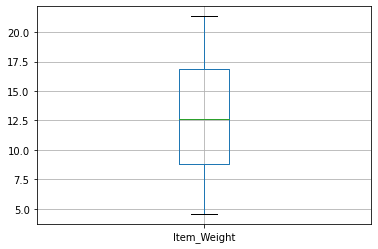

In [16]:
#boxplot
#item weight

df.boxplot(column = 'Item_Weight');

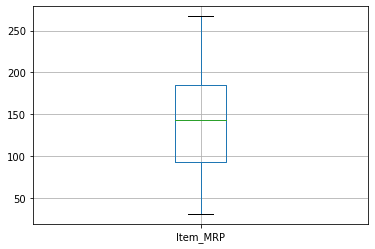

In [17]:
#boxplot
#item MRP

df.boxplot(column = 'Item_MRP');

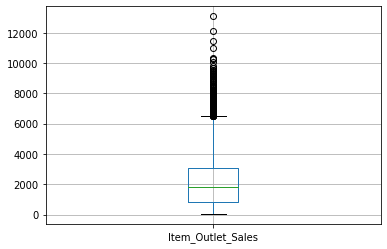

In [18]:
#boxplot
#item outlet sales

df.boxplot(column = 'Item_Outlet_Sales');

**--> Heatmap**

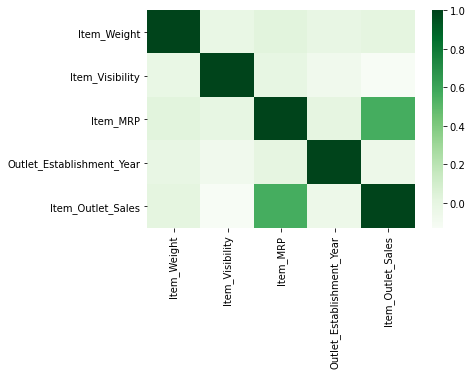

In [19]:
#heatmap
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens');

In [20]:
#checking correlation between item outlet sales and item MRP
outlet_sales_by_MRP = df['Item_Outlet_Sales'].corr(df['Item_MRP'])
outlet_sales_by_MRP

0.5675744466569195

For Part 4, your task is to build several data visualizations to help your stakeholders better understand trends in the data. Feel free to get creative with this week - this is your chance to set your project apart from others with exceptional visualizations and analyses.

Build on your previous cleaning, exploration, and analysis.  
Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).
Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc.

**--> Based on the data exploration and initial visualizations in Part 3, I want to follow up with the Item Fat Content column values of Low Fat and Regular and tease out any possible correlations.** 

In [23]:
#grouping low fat content by item type
#get count for items sold
low_fat_df = df[(df['Item_Fat_Content'] == 'Low Fat')]
low_fat_df = low_fat_df.groupby(['Item_Fat_Content', 'Item_Type'])['Item_Outlet_Sales'].count().reset_index()
low_fat_df

,Item_Fat_Content,Item_Type,Item_Outlet_Sales
0,Low Fat,Baking Goods,329
1,Low Fat,Breads,140
2,Low Fat,Breakfast,41
3,Low Fat,Canned,341
4,Low Fat,Dairy,418
5,Low Fat,Frozen Foods,450
6,Low Fat,Fruits and Vegetables,630
7,Low Fat,Hard Drinks,214
8,Low Fat,Health and Hygiene,520
9,Low Fat,Household,910


In [24]:
#grouping regular (fat) content by item type
#get count for items sold
regular_df = df[(df['Item_Fat_Content'] == 'Regular')]
regular_df = regular_df.groupby(['Item_Fat_Content', 'Item_Type'])['Item_Outlet_Sales'].count().reset_index()
regular_df

,Item_Fat_Content,Item_Type,Item_Outlet_Sales
0,Regular,Baking Goods,319
1,Regular,Breads,111
2,Regular,Breakfast,69
3,Regular,Canned,308
4,Regular,Dairy,264
5,Regular,Frozen Foods,406
6,Regular,Fruits and Vegetables,602
7,Regular,Meat,255
8,Regular,Seafood,27
9,Regular,Snack Foods,508


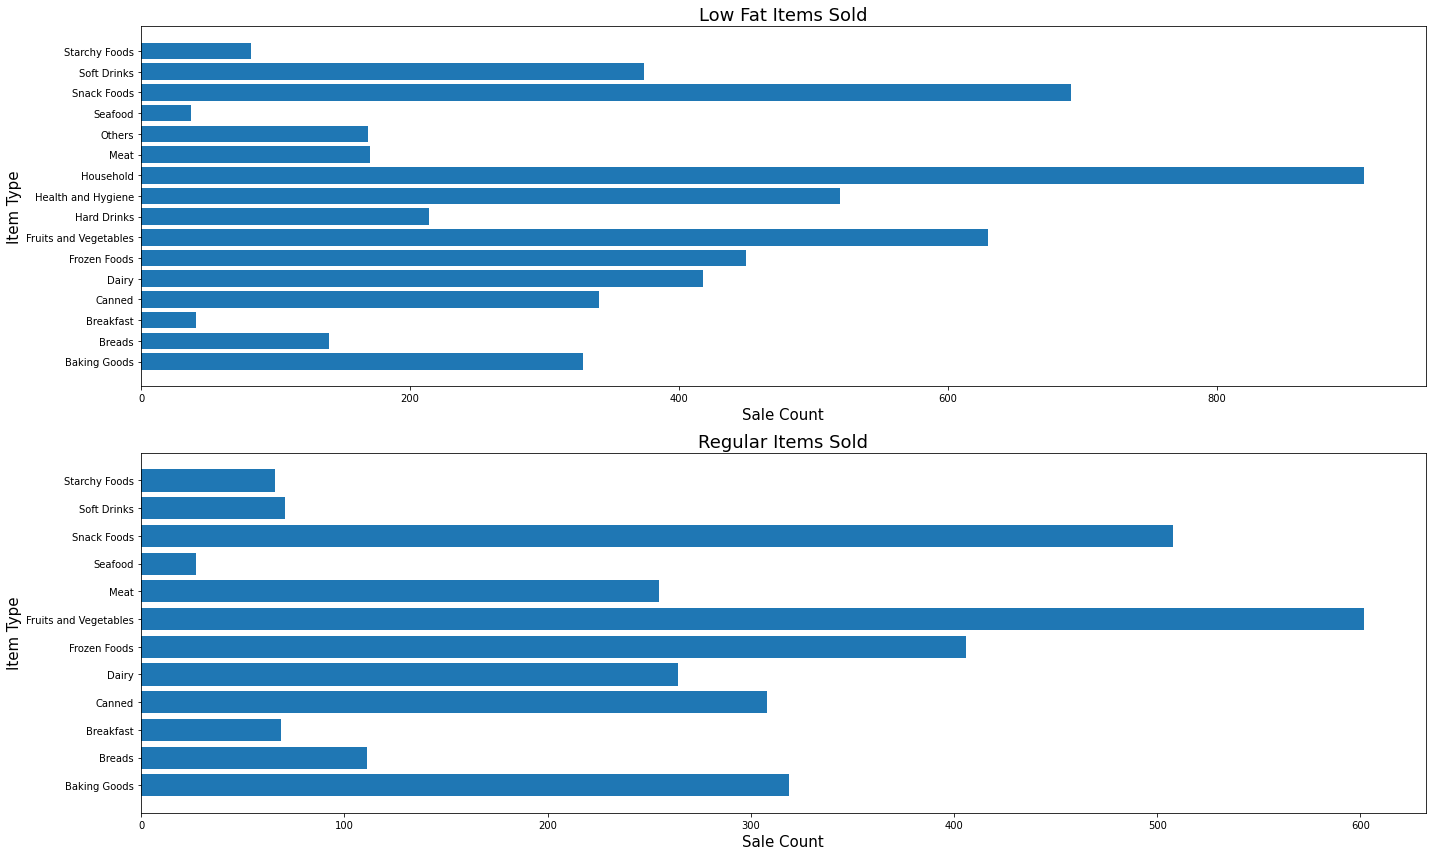

In [25]:
plot.figure(figsize=(20,12))
# bar plot with matplotlib

plot.subplot(2, 1, 1)
plot.barh('Item_Type', 'Item_Outlet_Sales', data=low_fat_df,  label = 'Low Fat Sale Count');
plot.xlabel('Sale Count', size=15);
plot.ylabel('Item Type', size=15);
plot.title('Low Fat Items Sold', size=18);

plot.subplot(2, 1, 2)
plot.barh('Item_Type', 'Item_Outlet_Sales', data=regular_df,  label = 'Regular Sale Count');
plot.xlabel('Sale Count', size=15);
plot.ylabel('Item Type', size=15);
plot.title('Regular Items Sold', size=18);

plot.tight_layout()

**--> Interpretation:**

**Top 3 Low Fat items sold are Household, Snack Foods, and Fruits and Vegetables**

**Top 3 Regular items sold are Fruits and Vegetables, Snack Foods, and Frozen Foods**

**--> I'll use Low Fat and Regular to filter out another column variable...**

In [30]:
#get count of outlet types
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

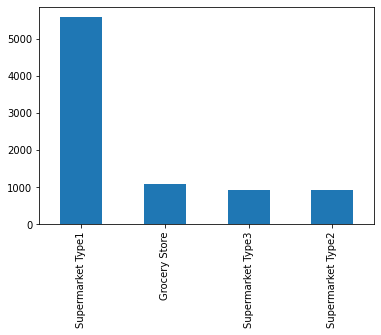

In [41]:
#visualize
df['Outlet_Type'].value_counts().plot(kind = 'bar');

In [36]:
#group by low fat content by outlet type and get count
lf_outlet_df = df[(df['Item_Fat_Content'] == 'Low Fat')]
lf_outlet_df = lf_outlet_df.groupby(['Item_Fat_Content', 'Outlet_Type'])['Item_Outlet_Sales'].count().reset_index()
lf_outlet_df

,Item_Fat_Content,Outlet_Type,Item_Outlet_Sales
0,Low Fat,Grocery Store,705
1,Low Fat,Supermarket Type1,3609
2,Low Fat,Supermarket Type2,598
3,Low Fat,Supermarket Type3,605


In [42]:
#group by regular (fat) content by outlet type and get count
reg_outlet_df = df[(df['Item_Fat_Content'] == 'Regular')]
reg_outlet_df = reg_outlet_df.groupby(['Item_Fat_Content', 'Outlet_Type'])['Item_Outlet_Sales'].count().reset_index()
reg_outlet_df

,Item_Fat_Content,Outlet_Type,Item_Outlet_Sales
0,Regular,Grocery Store,378
1,Regular,Supermarket Type1,1968
2,Regular,Supermarket Type2,330
3,Regular,Supermarket Type3,330


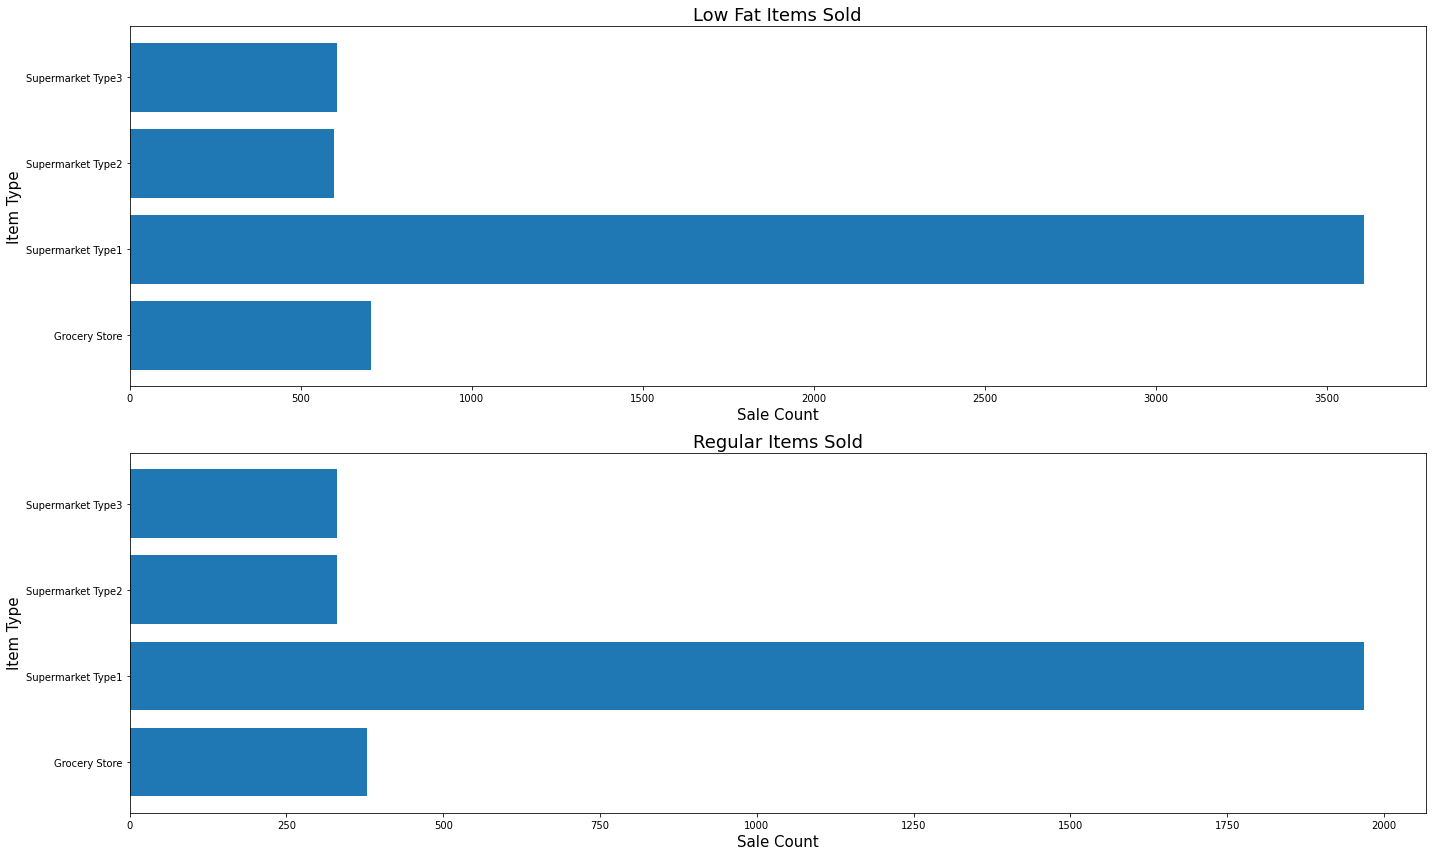

In [40]:
plot.figure(figsize=(20,12))
# bar plot with matplotlib

plot.subplot(2, 1, 1)
plot.barh('Outlet_Type', 'Item_Outlet_Sales', data=lf_outlet_df,  label = 'Low Fat Sale Count by Outlet Type');
plot.xlabel('Sale Count', size=15);
plot.ylabel('Item Type', size=15);
plot.title('Low Fat Items Sold', size=18);

plot.subplot(2, 1, 2)
plot.barh('Outlet_Type', 'Item_Outlet_Sales', data=reg_outlet_df,  label = 'Regular Sale Count by Outlet Type');
plot.xlabel('Sale Count', size=15);
plot.ylabel('Item Type', size=15);
plot.title('Regular Items Sold', size=18);

plot.tight_layout()

**--> Interpretation:**

**Supermarket Type1 overwhelmingly had the highest amount of Low Fat sales**

**Supermarket Type1 overwhelmingly had the highest amount of Regular sales**
